# Stress Detection in Working Environments Using Physiological Sensors

### Ilyass El Mansouri - Sajeevan Puvikaran - Belkacem Zehani - Salim Tabarani - Yanis Daci 

## Business Introduction

#### Background and state of affairs
The challenge of the actual global economy and the use of advanced technologies have change the way we work. This has resulted in an increase workload, it has become a problem in many organizations, where employees have encountered psychological problems related to work stress. In particular, statistics display that stress levels reported by employees in North America are very high, 55% of the population has reported that work-related stress had an impact on their physical and mental health. 
<br/>

<br/>
It has been proven that work-related stress engander disease activation. Several studies have shown that stress can lead to several negative health effects, such as high blood pressure, lack of sleep, susceptibility to infections, and cardiovascular diseases. All these situations also result to musculoskeletal diseases, immunological problems and mental health problems such as anxiety and depressive disorders. We noticed for example in the studies of European Foundation for the Improvement of Living and Working Conditions that a decline in physical and mental health due to work-related stress leads to a decrease in the performance and overall productivity of organizations and increased cost in terms of absenteeism.
<br/>

#### Business Need
<br/>
Considering detrimental effects of prolonged exposure to stress both for employees and organizations, there is a clear need for a system to regularily monitor the well-being of workers and act when levels of stress are too high in the overall ecosystem. In order to do this, we consider ourselves in the case of a company that is concerned about the well-being of its employees and offers annual medical check-ups in which they monitor a daily life of some of their employees. We will therefore introduce a method that will process raw medical data and indicate the emotional state of the test subject at regular intervals of time, these results will help a doctor have a clearer idea of the subject's condition throughout his time working. If daily stress levels are alarming, a company can take the necessary steps to address them.
<br/>

## Introducing the Data 

In everyday language, stress typically indicates strain caused by physical or psychological pressures at work, at school, or in personal life as well as by one’s environment. From this point of view, stress can be seen as a defensive process to protect oneself from potential injury and threats to emotional well-being. Thus, it is not surprising that stress is related to the capacity to adapt and respond to various circumstances.
<br/>

<table>
    <tr>
    <td>
        <img id ='im1' src='stressometer.png' width="300" >
    </td>
    </tr>
</table>

In October 2018, a group of researchers introduced a WEarable Stress and Affect Detection (WESAD) dataset that provides a multimodal high-quality dataset with various affective states. The experiment tested for three affective states amusement, stress, and neutral. It also could help determine whether a test subject was or was not stressed. 
<br/>

The WESAD dataset was composed after a stress test that was performed on to twelve males and three females. To collect their data, they used both a chest and a wrist-worn devices: a RespiBAN Professional2 and an Empatica E4. 
<br/>
The RespiBAN itself is equipped with sensors to measure accelerometer and respiratory data. All signals were sampled at 700 Hz.
<br/>
All subjects wore the Empatica E4 on their non-dominant hand. The Empatica E4 recorded blood volume pulse at 64Hz, temperature at 4Hz, and electrodermal activity at 4Hz.
<br/>

<table>
    <tr>
    <td>
        <img id ='im1' src='ima_appareil.png' width="500" >
    </td>
    </tr>
</table>

In addition, the subjects were asked to follow a guided meditation in order to de-excite them after the stress and amusement conditions. After the subjects had been equipped with the sensors, a 20 minute baseline test was recorded. During the baseline, the subjects were asked to sit or stand at a table. After the baseline condition results were recorded, there was an amusement condition test. During the amusement condition, the subjects watched a set of eleven funny video clips. In total, the amusement condition had a length of 392 seconds.
<br/>
At the end of the protocol, the sensors were again synchronised via a double tap gesture. In total, the study had a duration of about two hours.

Raw sensor data was recorded with two devices: a chest-worn device (RespiBAN) and a wrist-worn device (Empatica E4). 

***** 
The double-tap signal pattern was used to manually synchronise the two devices’ raw data. The result is provided in the files SX.pkl, one file per subject. This file is a dictionary, with the following keys:
- Data: includes all the raw data, in two fields: <b>
    - Chest: RespiBAN data (ECG, EMG, RESP, Chest_EDA)
    - Wrist : EmpaticaE4data (ACC, BVP, TEMP, Wrist_EDA)
    
</b>
    
******
- label : ID of the respective study protocol condition, sampled at 700 Hz. The following IDs are provided: <b>
    - 0 = not defined / transient
    - 1 = baseline
    - 2 = stress
    - 3 = amusement
    - 4 = meditation
    
</b>

******

#### Feature Description :

In order to convert the raw sensor values into SI units, each channel has to transformed based on the formulas given below (signal contains the raw sensor values, $vcc=3$, $\text{chan_bit}=2^{16}$).
- <b>ECG (mV):</b> Cardiovascular system activity can be measured through various physiological signals. In the computer science literature, blood volume pulse (<b>BVP</b>) and electrocardiography (<b>ECG</b>) are the most frequently employed signals. BVP is related to the amount of blood flowing into the peripheral vessels, such as those in fingers or earlobes, and is generally measured through a photoplethysmograph (PPG). The ECG signal measures the electrical activity of the heart through electrodes placed on the chest.
$$(\frac{\text{signal}}{\text{chan_bit}}-0.5)*vcc$$
- <b>EDA (μS):</b> Electrodermal activity (EDA) sensors measure changes in the electrical conductivity of the skin surface. Changes in EDA can be produced by various physical and emotional stimuli that trigger variations in sweat-gland activity. Moreover, current EDA sensors are unobtrusive and allow for reliable signal recordings. Many studies have successfully employed EDA as stress indicators during the presentation of a range of stressful stimuli, showing that these signals are a valuable tool for stress assessment. However, EDA alone cannot provide definitive information about stress and anxiety: other physiological signals or instruments such as self-reports are required to discern between positive and negative high-arousal states.

$$\frac{\frac{\text{signal}}{\text{chan_bit}}*vcc}{0.12}$$   
- <b>EMG (mV):</b> Muscle activity is measured through electromyography (EMG), which detects the electrical discharges caused by contractions of muscle fibers. Muscle activity is measured by placing electrodes on the skin above the considered muscles (surface EMG). Analysis of facial muscle activity can help assess other physiological responses relative to stress, such as the startle response, i.e., a complex of bodily reactions to a strong, rapid, and unexpected stimulus.
$$\frac{\text{signal}}{\text{chan_bit}}*vcc$$
- <b>TEMP (°C):</b>
$$v_{out} = \frac{\text{signal}*vcc}{\text{chan_bit}-1.}$$
$$rntc = \frac{(10^4)*v_{out}}{vcc-vout}- 273.15 + \frac{1}{1.12*10^{-3}} + 2.34*10^{-4}*\log(rntc)+ 8.77*10^{-8}*\log(rntc)^3$$


- <b>RESPIRATION (%):</b> 
Respiration is strongly related to cardiovascular system activity, and is mainly influenced by changes between calm and excited states. The respiratory signal can be recorded using an elastic band placed on a user’s midsection. Respiratory rate (RR) and respiratory amplitude (RA) are employed as measures of Stress activity; however, is regarded as one of the least sensitive metrics for respiratory data analysis. Standard deviations of these measurements, as well as other measurements of their variability, have been frequently used to characterize respiratory variability, which seems to be negatively correlated to anxiety
$$\frac{\text{signal}} {\text{chan_bit} - 0.5} * 100$$

#### Synchronization

The double-tap signal pattern was used to manually synchronise the two devices’ raw data.

---

### Requirements

- numpy>=1.15
- pandas>=0.23
- matplotlib>=3.0
- scikit-learn>=0.20
- peakutils>=1.3
- neurokit>=0.2
- googledrivedownloader >= 0.3

To install neurokit, uncomment the following cell :

In [ ]:
#!pip install neurokit

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1eFs20byk-G5iGzu-UQkItrkGyXBgfk97',
                                    dest_path='./data/subject_data_1.csv')

## Exploring the Dataset

In [121]:
data = pd.read_csv(
    r"./data/subject_data_1.csv",
    sep=",",
    encoding="utf-8",
    error_bad_lines=False,
    low_memory=False,
)

In [122]:
data.head()

,ECG,EMG,RESP,Wrist_ACC_X,Wrist_ACC_Y,Wrist_ACC_Z,BVP,TEMP,Chest_EDA,Wrist_EDA,Label
0,-2.682336,-1.048205,2.432716,-64.599463,16.154848,78.853819,-3.734571,33.515765,-1.764917,2.072567,0
1,-3.157654,-1.700669,3.706643,-58.709727,6.389444,59.584580,-20.378579,36.300723,1.995902,5.216919,0
2,1.014520,2.690761,2.448980,-16.750075,-4.133757,79.351876,-26.806272,33.967136,0.231909,-2.333052,0
3,-0.245876,3.115432,2.950328,-3.121037,6.054145,58.205473,-30.216204,36.394645,2.892129,0.995137,0
4,-0.294237,0.829264,5.083190,-37.292041,-6.843816,21.654431,-25.048682,30.457278,3.698611,1.457089,0


### Preprocessing of the Data

In [123]:
#Signing Static Values for the RAW Sensor Data
vcc=3
chan_bit=65536

data['ECG']=data['ECG'].apply(lambda x: ((x/chan_bit-0.5)*vcc)) #in mV
data['EMG']=data['EMG'].apply(lambda x: ((x/chan_bit-0.5)*vcc)) #in mV
data['RESP']=data['RESP'].apply(lambda x: ((x/chan_bit-0.5)*100)) #in %age
data['Wrist_ACC_X']=data['Wrist_ACC_X'].apply(lambda x: ((x*2*9.8)/128)) #in m/s^2
data['Wrist_ACC_Y']=data['Wrist_ACC_Y'].apply(lambda x: ((x*2*9.8)/128)) #in m/s^2
data['Wrist_ACC_Z']=data['Wrist_ACC_Z'].apply(lambda x: ((x*2*9.8)/128)) #in m/s^2

### Feature Extraction

In [124]:
def compute_rolling_mean(data, feature, row_window):
    name = '_'.join([feature, row_window, 'mean'])
    data[name] = data[feature].rolling(int(row_window)).mean()
    data[name] = data[name].ffill().bfill()
    data[name].astype(data[feature].dtype)
    return data

In [128]:
data = compute_rolling_mean(data, 'Wrist_ACC_X', '5')

In [129]:
data.head(10)

,ECG,EMG,RESP,Wrist_ACC_X,Wrist_ACC_Y,Wrist_ACC_Z,BVP,TEMP,Chest_EDA,Wrist_EDA,Label,Wrist_ACC_X_5_mean
0,-1.500123,-1.500048,-49.996288,-9.891793,2.473711,12.074491,-3.734571,33.515765,-1.764917,2.072567,0,-5.526966
1,-1.500145,-1.500078,-49.994344,-8.989927,0.978384,9.123889,-20.378579,36.300723,1.995902,5.216919,0,-5.526966
2,-1.499954,-1.499877,-49.996263,-2.564855,-0.632982,12.150756,-26.806272,33.967136,0.231909,-2.333052,0,-5.526966
3,-1.500011,-1.499857,-49.995498,-0.477909,0.927041,8.912713,-30.216204,36.394645,2.892129,0.995137,0,-5.526966
4,-1.500013,-1.499962,-49.992244,-5.710344,-1.047959,3.315835,-25.048682,30.457278,3.698611,1.457089,0,-5.526966
5,-1.500039,-1.499949,-49.992576,-13.411467,-4.930701,-6.782218,-20.633071,32.551815,-1.027913,1.019428,0,-6.230900
6,-1.500068,-1.499859,-49.995590,-9.465318,-9.268872,-21.265234,-10.255961,32.535515,1.175764,4.232340,0,-6.325979
7,-1.499891,-1.500036,-49.993503,-9.557745,10.875261,8.482642,-17.144665,32.325820,-1.087617,0.454080,0,-7.724557
8,-1.499966,-1.499993,-49.993735,-16.385733,-13.211974,-1.475989,-20.787937,34.479809,3.257627,3.457554,0,-10.906122
9,-1.500078,-1.500019,-49.994278,-5.569673,-2.216929,11.667440,-30.905873,34.597349,2.648650,-1.615298,0,-10.877987


### Introduducing Neurokit package

In [81]:
import neurokit as nk

Neurokit is A Python Toolbox for Statistics and Neurophysiological Signal Processing (EEG, EDA, ECG, EMG...). It provides high-level integrative functions with good and flexible defaults, allowing users to focus on what’s important.

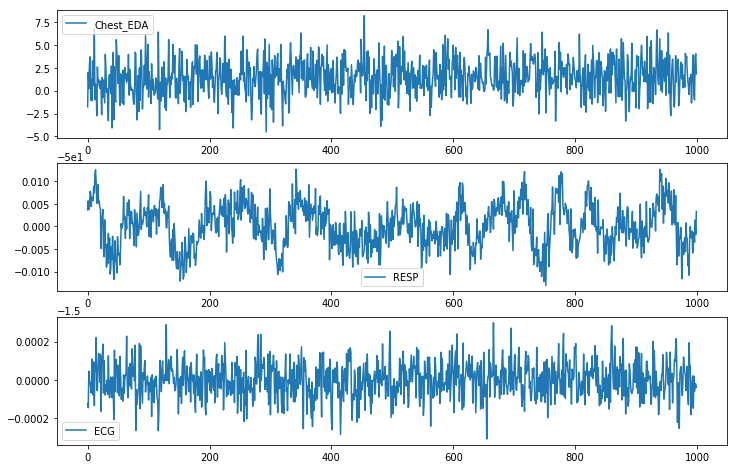

In [151]:
fig, axes = plt.subplots(3, 1, figsize=(12,8))

data.head(1000).plot(y=['Chest_EDA'], ax=axes[0])
data.head(1000).plot(y=['RESP'], ax=axes[1])
data.head(1000).plot(y=['ECG'], ax=axes[2])

plt.show()

We need to preprocess the data

### Filtering Raw data : 

In [153]:
# Get labels
labels = data["Label"]
baseline = np.asarray([idx for idx,val in enumerate(labels) if val == 1])
stress = np.asarray([idx for idx,val in enumerate(labels) if val == 2])
amusement = np.asarray([idx for idx,val in enumerate(labels) if val == 3])

In [154]:
print("Baseline:", data['ECG'][baseline].shape)
print("Stress:", data['ECG'][stress].shape)
print("Amusement:", data['ECG'][amusement].shape)

Baseline: (210700,)
Stress: (117300,)
Amusement: (66820,)


In [155]:
sample = 100000

l = ["ECG", "Chest_EDA", "EMG", "RESP", "TEMP"]
temp = {}
for i in range(len(l)):
    temp[l[i]] = data[l[i]].values.flatten()
df = pd.DataFrame(temp)

bio_b = nk.bio_process(
    rsp=df["RESP"][baseline].head(sample),
    eda=df["Chest_EDA"][baseline].head(sample),
    #ecg=df["EMG"][baseline].head(sample),
    sampling_rate=700,
)
bio_s = nk.bio_process(
    rsp=df["RESP"][stress].head(sample),
    eda=df["Chest_EDA"][stress].head(sample),
    #ecg=df["EMG"][stress].head(sample),    
    sampling_rate=700,
)
bio_a = nk.bio_process(
    rsp=df["RESP"][amusement].head(sample),
    eda=df["Chest_EDA"][amusement].head(sample),
    #ecg=df["EMG"][amusement].head(sample),
    sampling_rate=700,
)

In [156]:
def plot_neurokit(process_b, process_s, process_a, features):
    fig, axes = plt.subplots(3, 1, figsize=(15,10))
    
    nk.z_score(process_b["df"]).plot(y=features, ax=axes[0])
    nk.z_score(process_s["df"]).plot(y=features, ax=axes[1])
    nk.z_score(process_a["df"]).plot(y=features, ax=axes[2])
    
    axes[0].set_ylabel('Baseline')
    axes[1].set_ylabel('Stress')
    axes[2].set_ylabel('Amusement')

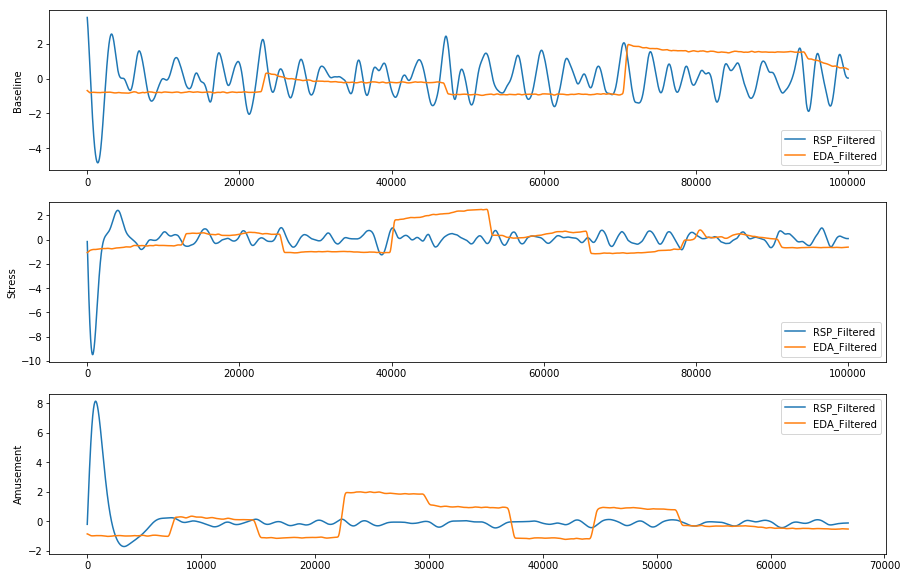

In [157]:
plot_neurokit(bio_b, bio_s, bio_a, features=["RSP_Filtered", "EDA_Filtered"])

### Feature Processing

#### EDA Phasic and Phonic

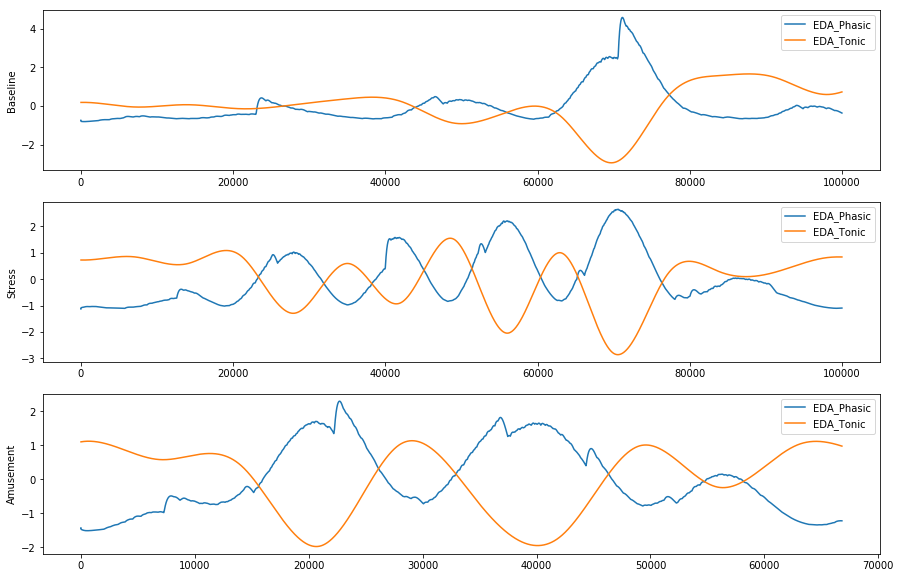

In [158]:
plot_neurokit(bio_b, bio_s, bio_a, features=["EDA_Phasic", "EDA_Tonic"])

### Detect peaks 

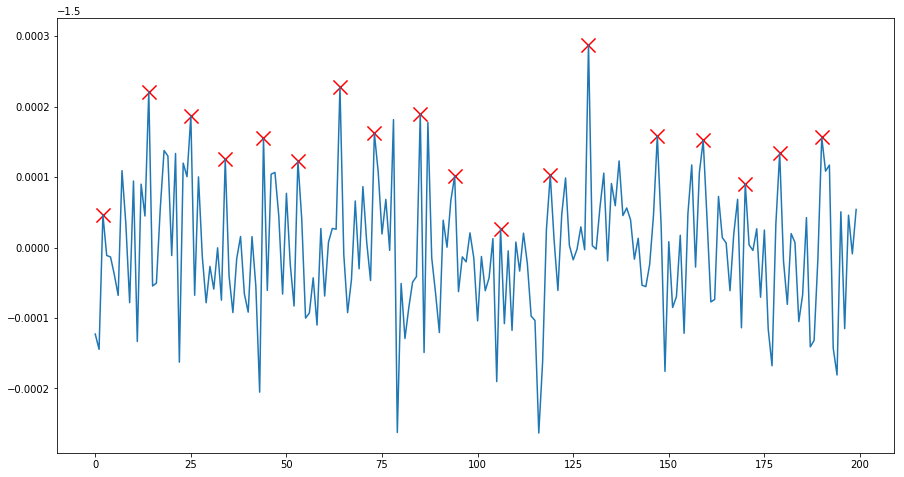

In [161]:
import peakutils

ecg_samp = data['ECG'][0:200]
indices = peakutils.indexes(np.array(ecg_samp), thres=-10, min_dist=8)

plt.figure(figsize=(15,8))
plt.plot(ecg_samp)
plt.scatter(x=indices, y=[ecg_samp[j] for j in indices], marker='x', c='red', s=200)
plt.show()

In [162]:
print(
    "Total dataset",
    data["ECG"][baseline].shape[0]
    + data["ECG"][stress].shape[0]
    + data["ECG"][amusement].shape[0],
)

Total dataset 394820


#### Testing data

In [163]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(data.loc[:, data.columns != 'Label'],
                                                                    data["Label"],
                                                                    test_size=0.33, random_state=42)

In [164]:
test=pd.concat([data_test,labels_test],axis=1)
train=pd.concat([data_train,labels_train],axis=1)

In [165]:
test.to_csv('data/test.csv')
train.to_csv('data/train.csv')

In [21]:
del data

## Workflow

<img src="Workflow.PNG">

### The model to submit

The submission consists of two files: `feature_extractor.py` which defines a `FeatureExtractor` class, and `classifier.py` which defines a `Classifier` class

- `FeatureExtractor` can (optionally) hold code to calculate and add additional features.
- `Classifier` fits the model and predicts on (new) data, as outputted by the `FeatureExtractor`. The prediction should be in the form of a (n_samples, 5) array with the probabilities of the 5 classes.

---

An example `FeatureExtractor`, adding an additional feature based on a moving window to include some time-aware features:

In [166]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin


class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X_df, y):
        return self

    def transform(self, X_df):
        X_df_new = X_df.copy()
        X_df_new = compute_rolling_mean(X_df_new, 'Wrist_ACC_X', '5')
        return X_df_new


def compute_rolling_mean(data, feature, row_window):
    name = '_'.join([feature, row_window, 'mean'])
    data[name] = data[feature].rolling(int(row_window)).mean()
    data[name] = data[name].ffill().bfill()
    data[name].astype(data[feature].dtype)
    return data


And an example `Classifier` doing a standard scaling and Logistic regression for the classification:

In [167]:
from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


class Classifier(BaseEstimator):
    def __init__(self):
        self.model = make_pipeline(StandardScaler(), DecisionTreeClassifier())

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

Using thus model interactively in the notebook to fit on the training data and predict for the testing data:

In [168]:
from sklearn.pipeline import make_pipeline

In [169]:
model = make_pipeline(FeatureExtractor(), Classifier())

In [170]:
model.fit(data_train, labels_train)

Pipeline(memory=None,
     steps=[('featureextractor', FeatureExtractor()), ('classifier', Classifier())])

In [171]:
y_pred = model.predict(data_test)

In [172]:
y_pred.shape

(344963,)

In [173]:
y_pred

array([1, 2, 0, ..., 0, 0, 1])

### Evaluation

Evaluating it on the individual points, we use the predicion, the recall and the F1-score:

In [174]:
from sklearn.metrics import f1_score, classification_report

In [175]:
f1_score(labels_test, y_pred, average='weighted')

0.7344783229673562

In [176]:
print(classification_report(labels_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78    167795
           1       0.66      0.67      0.67     69718
           2       0.74      0.73      0.73     38631
           3       0.62      0.63      0.63     22055
           4       0.74      0.73      0.73     46764

   micro avg       0.73      0.73      0.73    344963
   macro avg       0.71      0.71      0.71    344963
weighted avg       0.73      0.73      0.73    344963



### Evaluation with Cross-Validation

In [177]:
from sklearn.model_selection import cross_validate
from problem import get_cv

def evaluation(X, y):
    pipe = make_pipeline(FeatureExtractor(), Classifier())
    cv = get_cv(X, y)
    results = cross_validate(pipe, X, y, scoring=['f1_weighted'], cv=cv,
                            verbose=1, return_train_score=True,
                            n_jobs=1)
    return results

In [178]:
results = evaluation(data_train, labels_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


In [179]:
print("Training score F1 score: {:.3f}".format(np.mean(results['train_f1_weighted'])))
print("Testing score F1 score: {:.3f}\n".format(np.mean(results['test_f1_weighted'])))

Training score F1 score: 1.000
Testing score F1 score: 0.732



In [180]:
!ramp_test_submission --submission=starting_kit

Testing stress rate prediction
Reading train and test files from ./data ...
Reading cv ...
Training ./submissions/starting_kit ...
CV fold 0
	score  recall  precision  f1_score  Precision_Stress  final_score
	train    0.96       0.96      0.96              0.96         0.96
	valid    0.70       0.73      0.70              0.73         0.72
	test     0.70       0.73      0.70              0.73         0.72
CV fold 1
	score  recall  precision  f1_score  Precision_Stress  final_score
	train    0.95       0.96      0.96              0.96         0.96
	valid    0.71       0.73      0.71              0.73         0.72
	test     0.70       0.73      0.70              0.73         0.72
CV fold 2
	score  recall  precision  f1_score  Precision_Stress  final_score
	train    0.96       0.96      0.96              0.96         0.96
	valid    0.71       0.73      0.71              0.73         0.72
	test     0.70       0.73      0.70              0.73         0.72
CV fold 3
	score  recall  precision